In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./data/data1.csv')
data.head()


,area,buildtime,room_num,hall_num,floor,dire,exemption of business tax,exemption of double tax,quality education,distance,loc,price
0,87.81,2008,2,2,1,1,1,0,1,5000,1,41567
1,137.00,2001,3,2,3,2,0,1,1,680,2,51095
2,69.00,2005,2,2,2,2,0,1,1,5000,3,10870
3,64.06,1986,2,1,2,1,0,1,0,495,4,60100
4,58.62,1997,2,1,3,1,0,0,1,776,5,52883


In [120]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x = s.fit_transform(data)
x

array([[-0.23902461,  0.38064437, -0.41207151, ...,  1.25409458,
        -1.46165521, -0.43143775],
       [ 0.52310296, -0.4724221 ,  0.75911233, ..., -0.77204649,
        -1.43620223, -0.12914931],
       [-0.53045823,  0.01504445, -0.41207151, ...,  1.25409458,
        -1.41074925, -1.4053408 ],
       ...,
       [ 0.52511712,  1.35557748,  1.93029616, ..., -0.6927831 ,
         1.13454895,  1.14177561],
       [-0.55989597,  0.86811092, -1.58325534, ..., -0.54879576,
        -0.72351873, -0.28444968],
       [-1.1331572 , -2.42228832, -1.58325534, ..., -1.00983666,
        -0.18900611,  0.77946096]])

In [121]:
from scipy.stats import norm,skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import ElasticNet,Lasso,BayesianRidge,LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

y = data['price']
X = data.drop(['price'],axis=1)
X

,area,buildtime,room_num,hall_num,floor,dire,exemption of business tax,exemption of double tax,quality education,distance,loc
0,87.81,2008,2,2,1,1,1,0,1,5000,1
1,137.00,2001,3,2,3,2,0,1,1,680,2
2,69.00,2005,2,2,2,2,0,1,1,5000,3
3,64.06,1986,2,1,2,1,0,1,0,495,4
4,58.62,1997,2,1,3,1,0,0,1,776,5
...,...,...,...,...,...,...,...,...,...,...,...
5560,242.81,2010,4,3,1,1,0,1,1,770,55
5561,89.90,2007,2,2,3,2,0,1,1,511,44
5562,137.13,2016,4,2,3,2,0,0,0,849,103
5563,67.10,2012,1,2,3,1,0,1,0,1156,30


In [122]:
x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=0, test_size=0.25)
ntrain = x_train.shape[0]

mu = 55165.73 and sigma = 31519.56


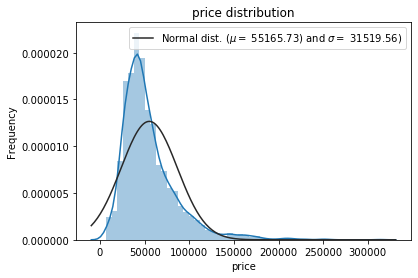

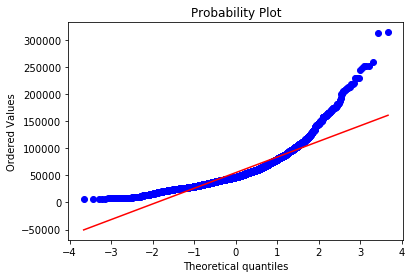

In [123]:
sns.distplot(y,fit=norm)
mu,sigma = norm.fit(y) 
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

# 分布图
plt.legend(['Normal dist. ($\mu=$ {:.2f}) and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# QQ图
fig = plt.figure()
res = stats.probplot(y,plot=plt)
plt.show()

mu = 10.78 and sigma = 0.52


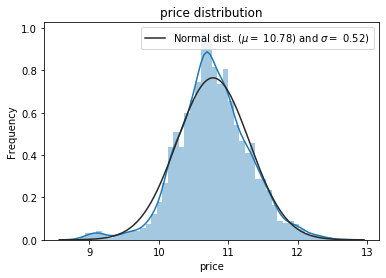

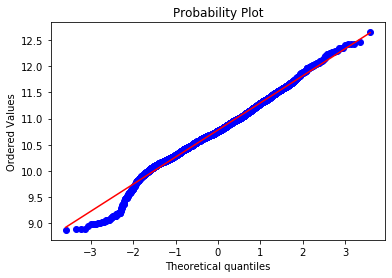

In [124]:
y = np.log1p(y_train)
sns.distplot(y,fit=norm)
mu,sigma = norm.fit(y) 
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

# 分布图
plt.legend(['Normal dist. ($\mu=$ {:.2f}) and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# QQ图
fig = plt.figure()
res = stats.probplot(y,plot=plt)
plt.show()

In [125]:
#计算偏度
from scipy.stats import norm,skew

numeric_feats = X.dtypes[X.dtypes != 'object'].index

# Check the skew of all numerical features
skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
dire,4.114576
area,3.454519
exemption of business tax,1.648066
room_num,0.727823
loc,0.678689
distance,0.435314
floor,-0.177523
quality education,-0.185155
hall_num,-0.617007
exemption of double tax,-0.836359


In [126]:
# Box_Cox变换使其满足正态分布
skewness = skewness[abs(skewness)> 0.75]
print('There are {} skewed numerical features to Box Cox transfrom'.format(skewness.dropna().shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.dropna().index
lam=0.15    #经验值0.15
for feat in skewed_features:
    X[feat] = boxcox1p(X[feat],lam)

There are 5 skewed numerical features to Box Cox transfrom


In [127]:
train = X[:ntrain]
test = X[ntrain:]
train

,area,buildtime,room_num,hall_num,floor,dire,exemption of business tax,exemption of double tax,quality education,distance,loc
0,6.400397,14.195323,2,2,1,0.730463,0.730463,0.000000,1,5000,1
1,7.293500,14.184404,3,2,3,1.194318,0.000000,0.730463,1,680,2
2,5.942124,14.190647,2,2,2,1.194318,0.000000,0.730463,1,5000,3
3,5.804465,14.160895,2,1,2,0.730463,0.000000,0.730463,0,495,4
4,5.642185,14.178149,2,1,3,0.730463,0.000000,0.000000,1,776,5
...,...,...,...,...,...,...,...,...,...,...,...
4168,6.454709,14.201549,2,2,3,0.730463,0.730463,0.000000,1,5000,82
4169,5.925854,14.175018,2,1,1,0.730463,0.000000,0.730463,1,1022,103
4170,7.531050,14.199993,3,2,1,0.730463,0.000000,0.000000,0,147,135
4171,6.156333,14.203103,2,2,2,1.194318,0.000000,0.730463,0,5000,33


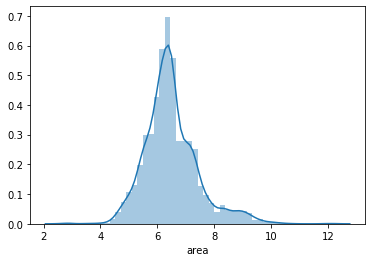

In [128]:
sns.distplot(train['area'])

In [145]:
n_folds=5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,train.values,y,scoring='neg_mean_squared_error',cv = kf))
    return rmse

In [130]:
# make_pipline:级联起来做事   RobustScaler:更适合处理离群点
lasso = make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))

In [131]:
# ElasticNet同时使用了L1和L2
Enet = make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))

In [132]:
# KernelRidge带有核函数的岭回归
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [133]:
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                 min_samples_split=10,min_samples_leaf=15,max_depth=4,random_state=5,
                 max_features='sqrt')

In [134]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,learning_rate=0.05,max_depth=3,
                             min_child_weight=1.7817,n_estimators=2200,reg_alpha=0.4640,reg_lambda=0.8571,
                             subsample=0.5213,silent=1,nthread=-1)

In [135]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=9,weights='distance',p=1)

In [144]:
score = rmsle_cv(lasso)
print('\nLasso score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))


Lasso score: -0.2731(0.0068)



In [137]:
score = rmsle_cv(Enet)
print('\nENet score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))


ENet score: 0.5225(0.0066)



In [138]:
score = rmsle_cv(KRR)
print('\nKernelRidge score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))

d:\virtualenv\hp_pre\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=6.54358e-18): result may not be accurate.
  overwrite_a=False)
d:\virtualenv\hp_pre\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=6.32502e-18): result may not be accurate.
  overwrite_a=False)
d:\virtualenv\hp_pre\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=6.17613e-18): result may not be accurate.
  overwrite_a=False)
d:\virtualenv\hp_pre\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=6.16997e-18): result may not be accurate.
  overwrite_a=False)



KernelRidge score: 0.5323(0.0093)



d:\virtualenv\hp_pre\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=5.80329e-18): result may not be accurate.
  overwrite_a=False)


In [139]:
score = rmsle_cv(GBoost)
print('\nGBoost score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))


GBoost score: 0.5763(0.0099)



In [140]:
score = rmsle_cv(model_xgb)
print('\nxgb score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))


xgb score: 0.5630(0.0089)



In [142]:
score = rmsle_cv(KNN)
print('\nKNN score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))


KNN score: 0.6008(0.0153)

